# LAB | Probability distributions

## Import libraries here

In [22]:
# Libraries
from scipy import stats
from scipy.stats import norm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Challenge 1 - Generate and Plot Normal Distributions

### Generate samples and test normal distribution.
- Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed.
- Read the documentation for `scipy.stats.norm.rvs` [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html). The function will help you create the normal random samples.

In [6]:
mean=50
str=5
sample_sizes=[10,50,500,5000]

random_samples = []
for size in sample_sizes:
    sample = norm.rvs(loc=mean, scale=str, size=size)
    random_samples.append(sample)

In [23]:
normal_distribution = stats.norm(50,5)
samples=[normal_distribution.rvs(size) for size in [10, 50, 500, 5000]]

### Plot normal distributions.
- To check the shape of the samples you have just created, you can use matplotlib. For example, you can use it to plot a histogram of each sample. 
- Your output should look like the figure below:

![normal distributions with different sample sizes](images/ch-1.png)

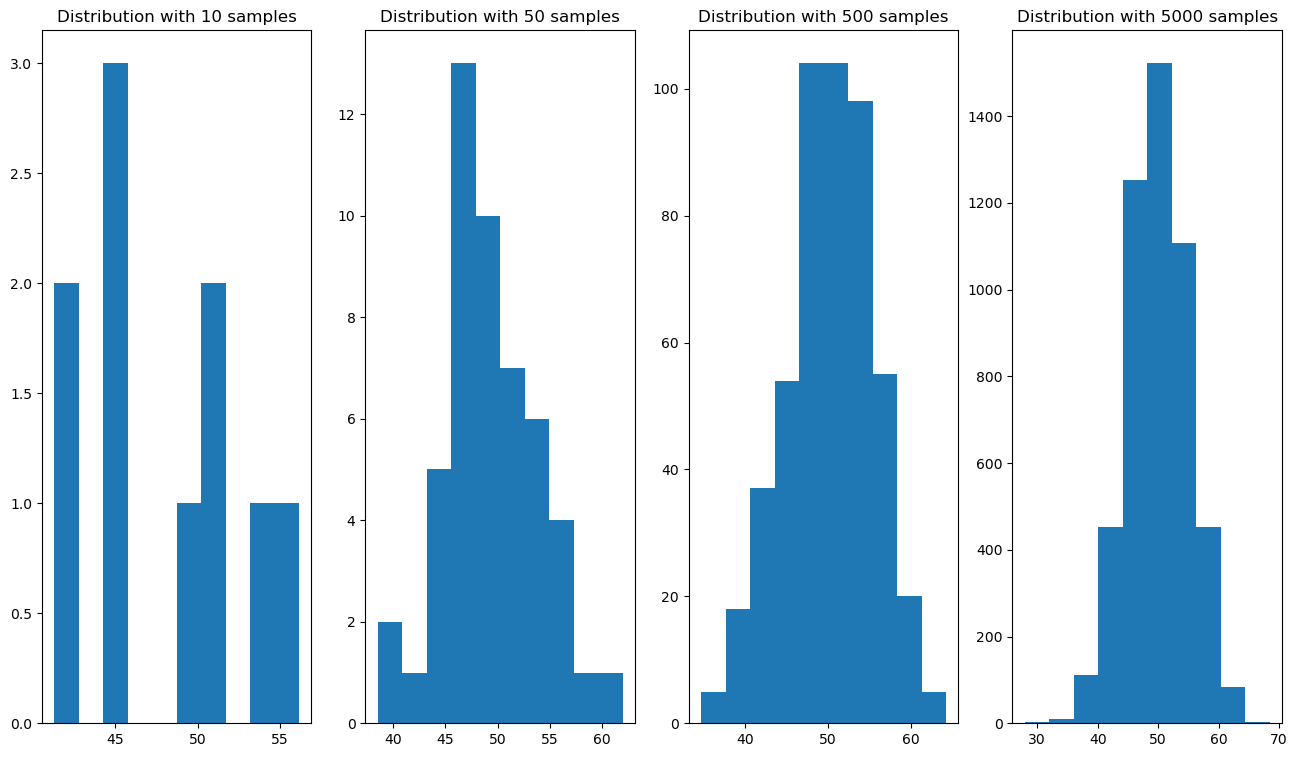

In [64]:
fig, axes = plt.subplots(1,4, figsize=(16,9))
for i,s in enumerate(samples):
    axes[i].hist(s)
    axes[i].set_title(f'Distribution with {sample_sizes[i]} samples')

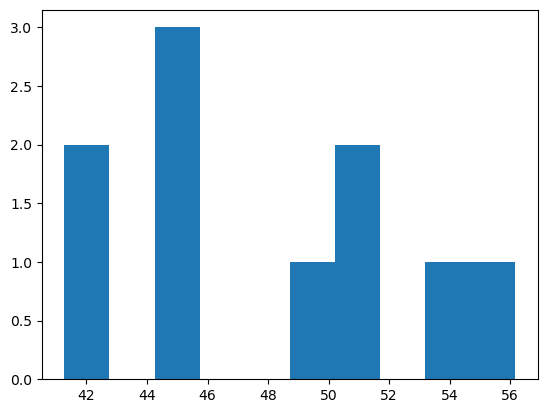

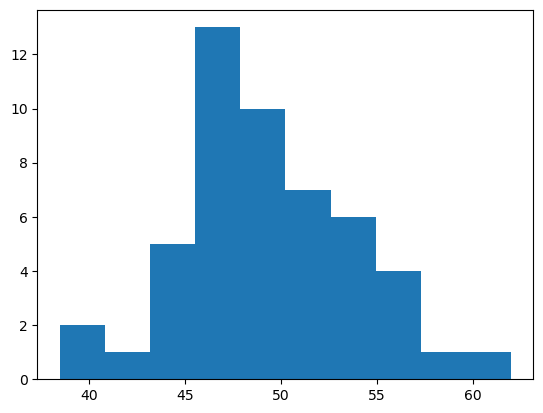

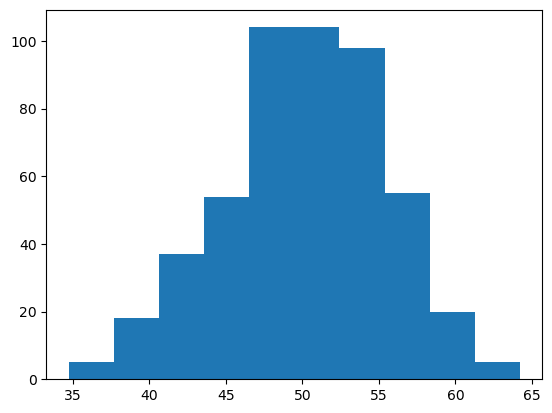

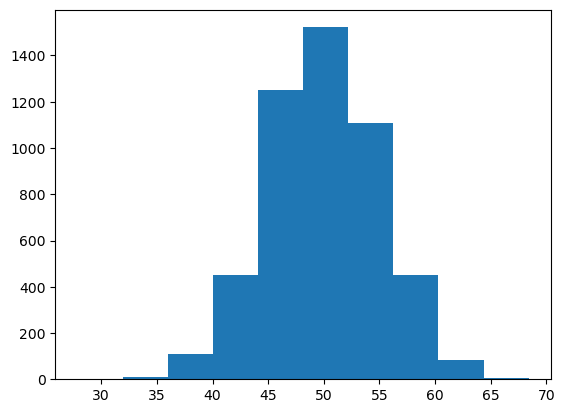

In [25]:
for s in samples:
    plt.hist(s)
    plt.show()

#### Compare the distributions above
- What do you observe? Explain with the Central Limit Theorem.

In [6]:
# Your answer here

# Challenge 2 - Plot Probability Mass Function (PMF)

### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

### Challenge

- We assume that the probability of clicking an advertisement in a Youtube video is 0.15. We have a sample of 5 people who watched the video and we want to plot the PMF for a binomial distribution.

####  Create the binomial distribution mentioned above. Store the result in a variable called `dist`. 
**Hint**: use binom from `scipy.stats.binom`. This object takes *n* and *p* as shape parameters, where *n* is the number of independent experiments and *p* the probability of success of the experiment.
```python
stats.binom(n, p)
```

In [21]:
youtube_dist=stats.binom(5,.15)

#### Plot the PMF of the distribution. 
- Your output should look like the figure below:

![binom 10](images/ch-2.png)

<BarContainer object of 6 artists>

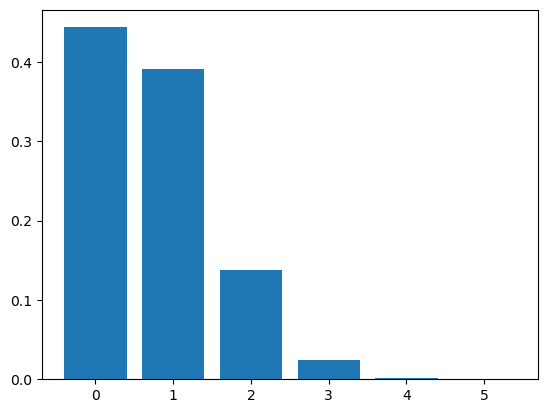

In [67]:
plt.bar([0,1,2,3,4,5],youtube_dist.pmf([0,1,2,3,4,5]))

#### Explain what you observe from the plot above.

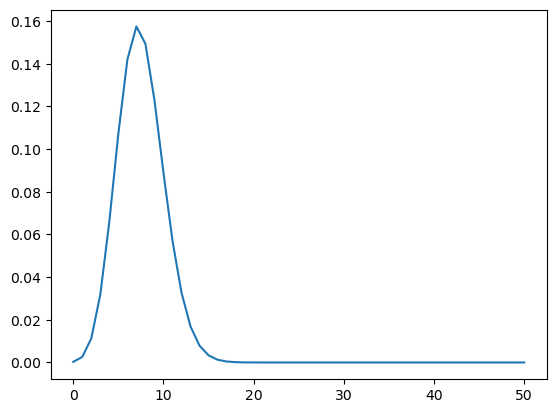

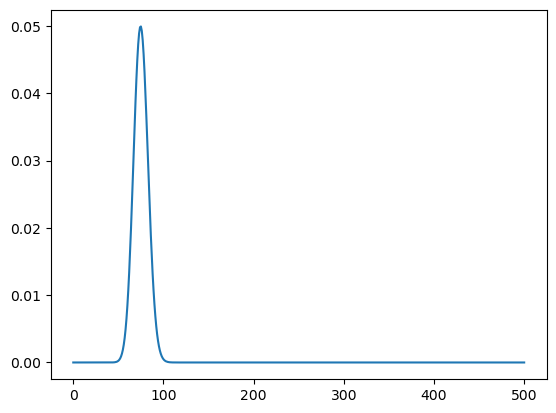

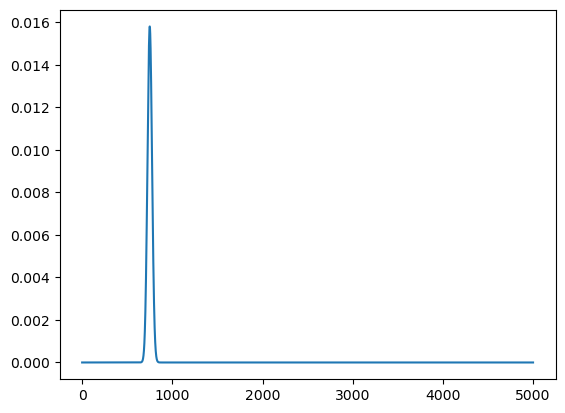

In [70]:
n_list=[50,500,5000]
for n in n_list:
    plt.plot(range(n+1),stats.binom(n,0.15).pmf(range(n+1)))
    plt.show()

#### Now plot PMF with 50, 500, and 5000 visitors.
- To plot the PMF, you can copy the code given above and replace variable `dist` for the name of the variables where you have stored the new binomial objects for 50, 500 and 5000 visitors.
- Your output should look like the figure below:
![prf](images/ch-2b.png)

In [12]:
# Your code here

#### What did you notice from the distribution plots?

In [14]:
# Your answer here

#  Challenge 3 - Poisson distribution

- The Poisson distribution is a discrete distribution function expressing probability of a given number of events occurring over a fixed interval of time or space.

- Using poisson distribution, solve the challenge below
- A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?
```python
scipy.stats.poisson.pmf()
```

In [37]:
poisson=stats.poisson(300)

In [38]:
poisson.pmf(320)

0.011612348610402475

#### What is the probability of getting 60 visits?

In [39]:
poisson.pmf(60)

2.622743762294515e-64

#### Create a list to store the Poisson distribution probabilities for 0 to 1000 visitors. Store your list in a variable called `arr`.

In [40]:
range_1000=range(1001)
arr=stats.poisson(300).pmf(range_1000)

#### Plot the probabilities.
- Your output should look like the figure below:
![poisson distribution](images/ch-3.png)

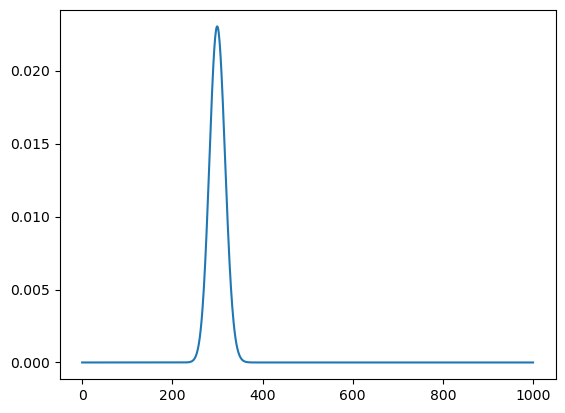

In [41]:
plt.plot(range_1000,arr)

# Challenge 4 - Central Limit Theorem
- In this challenge we will work with the central limit theorem
- A delivery company needs 35 minutes to deliver a package, with a standard deviation of 8 minutes. Suppose that in one day, they deliver 200 packages.
- What is the probability that the mean delivery time today is between 30 and 35 minutes?
```python
stats.norm.cdf()
```

In [43]:
average=35
stdev=8
n_sample=200
stdev_sample=stdev/np.sqrt(n_sample)

In [46]:
normal_dist =stats.norm(average,stdev_sample)
normal_dist.cdf(35)-normal_dist.cdf(30)

0.5

#### What is the probability that in total, it takes more than 115 hours to deliver all 200 packages?

In [49]:
1-normal_dist.cdf(34.5)

0.8116204410942089

# Challenge 5 - Normal Variables
The value (in thousands) of the monthly sales of a publishing company follows a normal distribution with a mean equal to 200 and a standard deviation equal to 40.
- Find the probability that the monthly sales are more than 300.
```python
stats.norm.cdf()
```


In [52]:
normal_dist=stats.norm(200,40)
1-normal_dist.cdf(300)

0.006209665325776159

#### Find the probability that the monthly sales fall between 160 and 240.

In [53]:
normal_dist.cdf(240)-normal_dist.cdf(160)

0.6826894921370859

#### Find the probability that the monthly sales do not exceed 150.

In [54]:
normal_dist.cdf(150)

0.10564977366685535

#### Find the probability that the monthly sales exceed 3000.

In [56]:
1- normal_dist.cdf(3000)

0.0

# Challenge 6 - Poisson distribution
The mean number of violent robberies per month that are registered in a particular barrio is 4.
- Find the probability that in a particular month there is no violent robbery.
```python
stats.norm.cdf()
```

In [59]:
stats.poisson(4).pmf(0)

0.01831563888873418

#### Find the probability that there are at least 1 robbery in a given month.

In [60]:
stats.poisson(4).cdf(1)

0.0915781944436709

#### Find the probability that there are between 2 and 6 (inclusive) robberies in a given month.

In [61]:
stats.poisson(4).cdf(6)-stats.poisson(4).cdf(2)

0.6512227160438819

#### Find the probability that there are more than 2 robberies in 15 days.

In [62]:
1- stats.poisson(4).cdf(4)

0.3711630648201266